In [1]:
import numpy as np
import pandas as pd

## Reading and understanding the data

In [2]:
bike_sharing_df = pd.read_csv("day.csv")

In [3]:
bike_sharing_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_sharing_df.shape

(730, 16)

In [5]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Inference:
#### As we can see count of non-null values is equal to the total number of rows, it implies there are no null values in the dataset.

In [6]:
bike_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Preparation

In [7]:
bike_sharing_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
# Drop the record index column(instant) as this is a redundant column for the analysis.
# Drop dte column as it is already split into other columns: mnth, yr, weekday, workingday
bike_sharing_df = bike_sharing_df.drop(['instant', 'dteday'], axis=1)

In [9]:
# Drop columns 'casual' and 'registered' as the target variable is cnt = casual+registered
bike_sharing_df = bike_sharing_df.drop(['casual', 'registered'], axis=1)

In [10]:
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
# Encoding/mapping the season column

bike_sharing_df.season = bike_sharing_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [13]:
bike_sharing_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [14]:
# Encoding/mapping the weathersit column

bike_sharing_df.weathersit = bike_sharing_df.weathersit.map({1:'Clear',2:'Misty',3:'Less_extreme_conditions',4:'Extreme_conditions'})

In [15]:
# Encoding/mapping the month column

bike_sharing_df.mnth = bike_sharing_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [16]:
# Encoding/mapping the weekday column

bike_sharing_df.weekday = bike_sharing_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

## Data Visualization

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

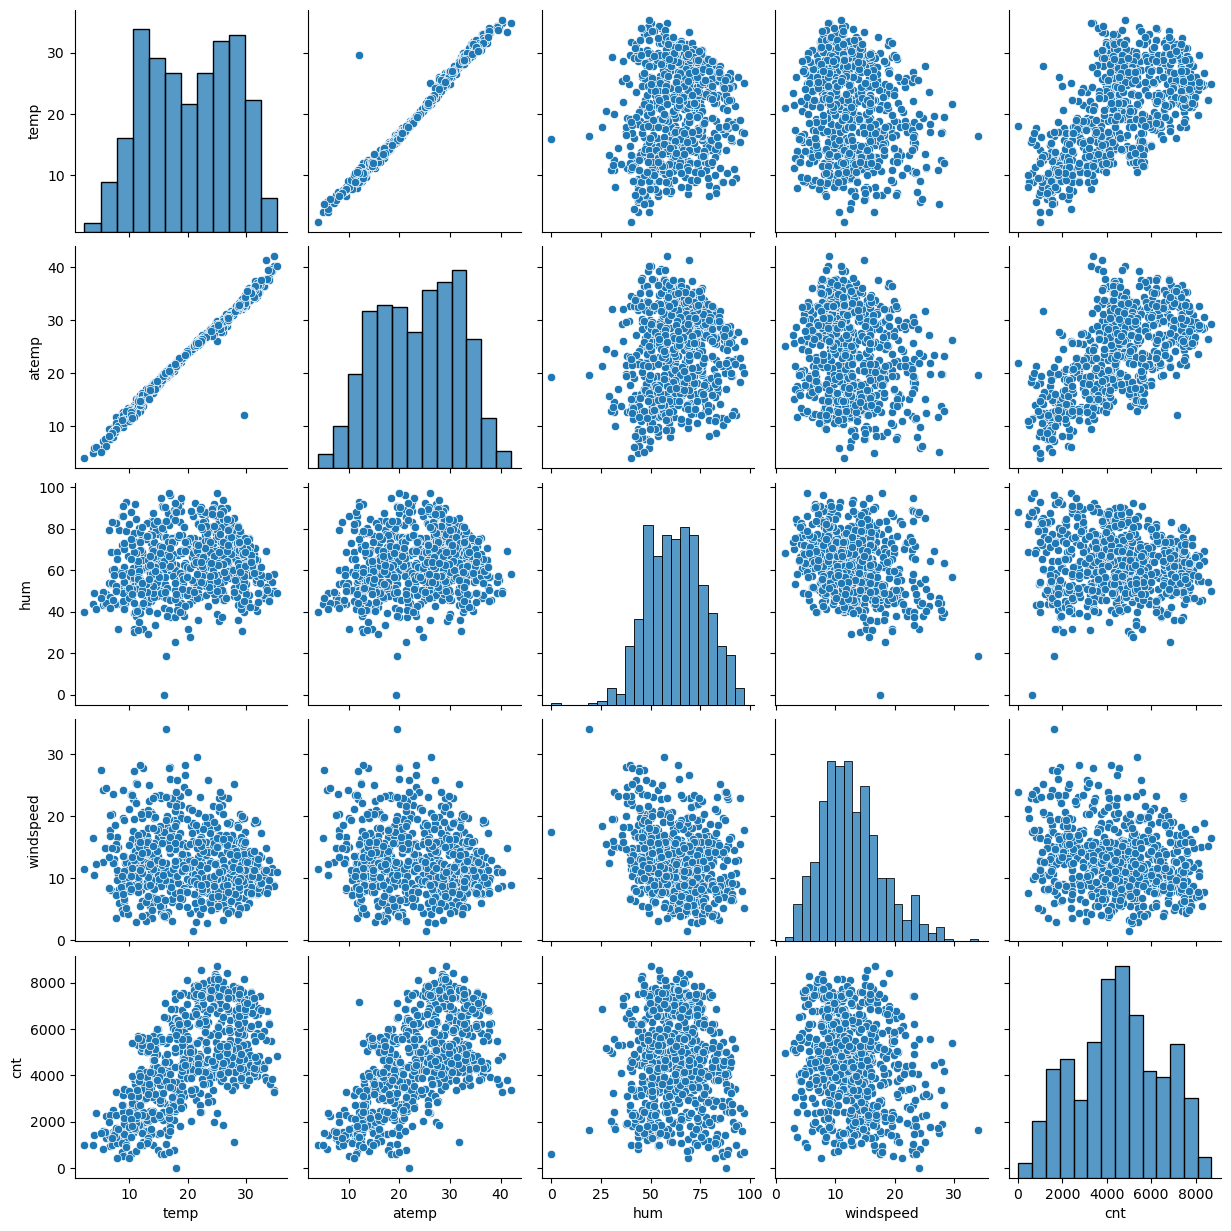

In [18]:
numeric_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
bike_sharing_numeric_columns = bike_sharing_df[numeric_columns]
sns.pairplot(bike_sharing_numeric_columns)
plt.show()

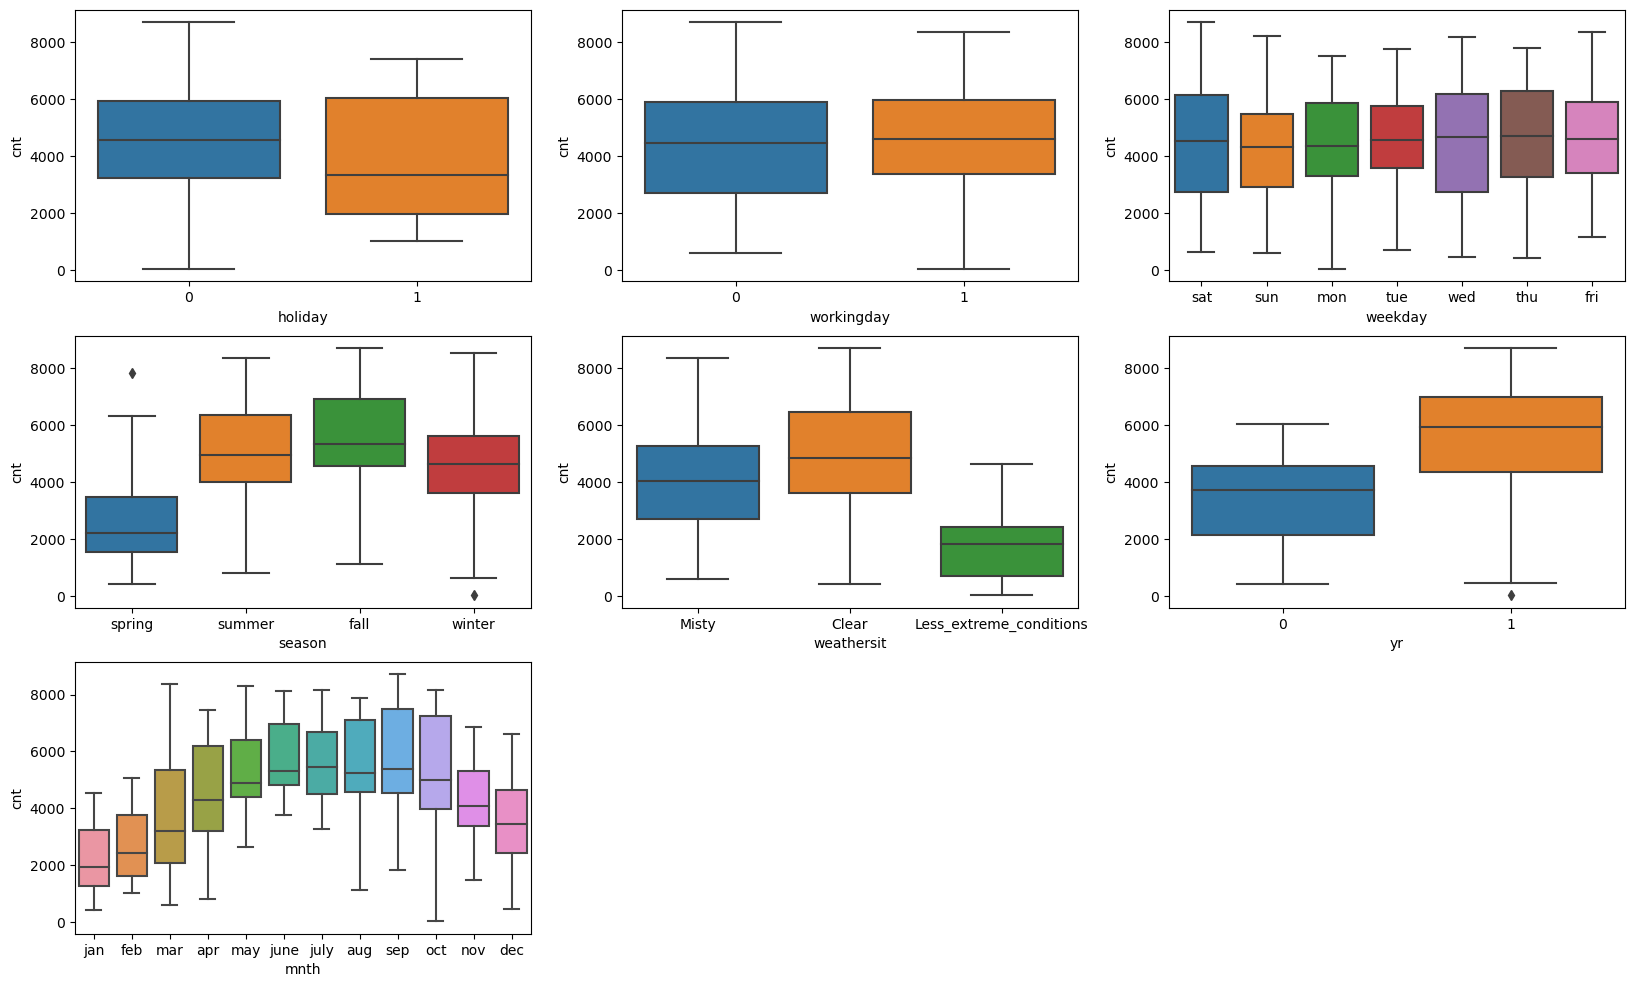

In [19]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_df)
plt.subplot(3,3,5) 
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing_df)
plt.show()

In [20]:
# Check correlation between numerical variables
bike_sharing_df.corr()


C:\Users\I540024\AppData\Local\Temp\ipykernel_19376\1490457807.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bike_sharing_df.corr()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


### Inference: 
1. temp and atemp are highly positively correlated.
2. temp and target variable(cnt) shows positive correlation.
2. workingday and holiday are negatively correlated.
3. Year is positively correlated with count of bikes shared(target variable)
4. humidity and target varibale are negatively correlated.
5. wind speed and target variable are negatively correlated.
6. holidays are negatively correlated with target variable

## Creating dummy variables

In [21]:
# Check values of season column
bike_sharing_df.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

The variable season has four levels. For this, we will create dummy variables.


In [22]:
# Get the dummy variables for the feature 'season'.

bike_sharing_df = pd.get_dummies(bike_sharing_df, columns = ['season'], drop_first = True)

# Check what the dataset looks like
bike_sharing_df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter
0,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [23]:
# Check values of holiday column
bike_sharing_df['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

As valid values are 0 and 1, no encoding/mapping is required.

In [24]:
# Check values of workingday column
bike_sharing_df['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

As valid values are 0 and 1, no encoding/mapping is required.

In [25]:
# Check values of weathersit column
bike_sharing_df['weathersit'].value_counts()

Clear                      463
Misty                      246
Less_extreme_conditions     21
Name: weathersit, dtype: int64

The variable weathersit has three possible values. For this, we will create dummy variables.

In [26]:

# Get the dummy variables for the feature 'season'.

bike_sharing_df = pd.get_dummies(bike_sharing_df, columns = ['weathersit'], drop_first = True)

# Check what the dataset looks like
bike_sharing_df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Less_extreme_conditions,weathersit_Misty
0,0,jan,0,sat,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,jan,0,sun,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,jan,0,mon,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,jan,0,tue,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,jan,0,wed,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [27]:
# Check values of weekday column
bike_sharing_df['weekday'].value_counts()

sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: weekday, dtype: int64

In [28]:

# Get the dummy variables for the feature 'weekday'.

bike_sharing_df = pd.get_dummies(bike_sharing_df, columns = ['weekday'], drop_first = True)

# Check what the dataset looks like
bike_sharing_df.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Less_extreme_conditions,weathersit_Misty,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed
0,0,jan,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,1,0,0,0,0
1,0,jan,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,1,0,0,0
2,0,jan,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,1,0,0,0,0,0
3,0,jan,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,1,0
4,0,jan,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,1


In [29]:
# Get the dummy variables for the feature 'mnth'.
bike_sharing_df['mnth'].value_counts()

jan     62
mar     62
may     62
july    62
aug     62
oct     62
dec     62
apr     60
june    60
sep     60
nov     60
feb     56
Name: mnth, dtype: int64

In [30]:

# Get the dummy variables for the feature 'mnth'.

bike_sharing_df = pd.get_dummies(bike_sharing_df, columns = ['mnth'], drop_first = True)

# Check what the dataset looks like
bike_sharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [31]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(bike_sharing_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
df_train.shape

(510, 30)

In [33]:
df_test.shape

(219, 30)

## Rescaling the Features
### We will use MinMax scaling.

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [35]:
# Apply scaler() to all the columns except 'dummy' variables
df_train[numeric_columns] = scaler.fit_transform(df_train[numeric_columns])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_dec,mnth_feb,mnth_jan,mnth_july,mnth_june,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0


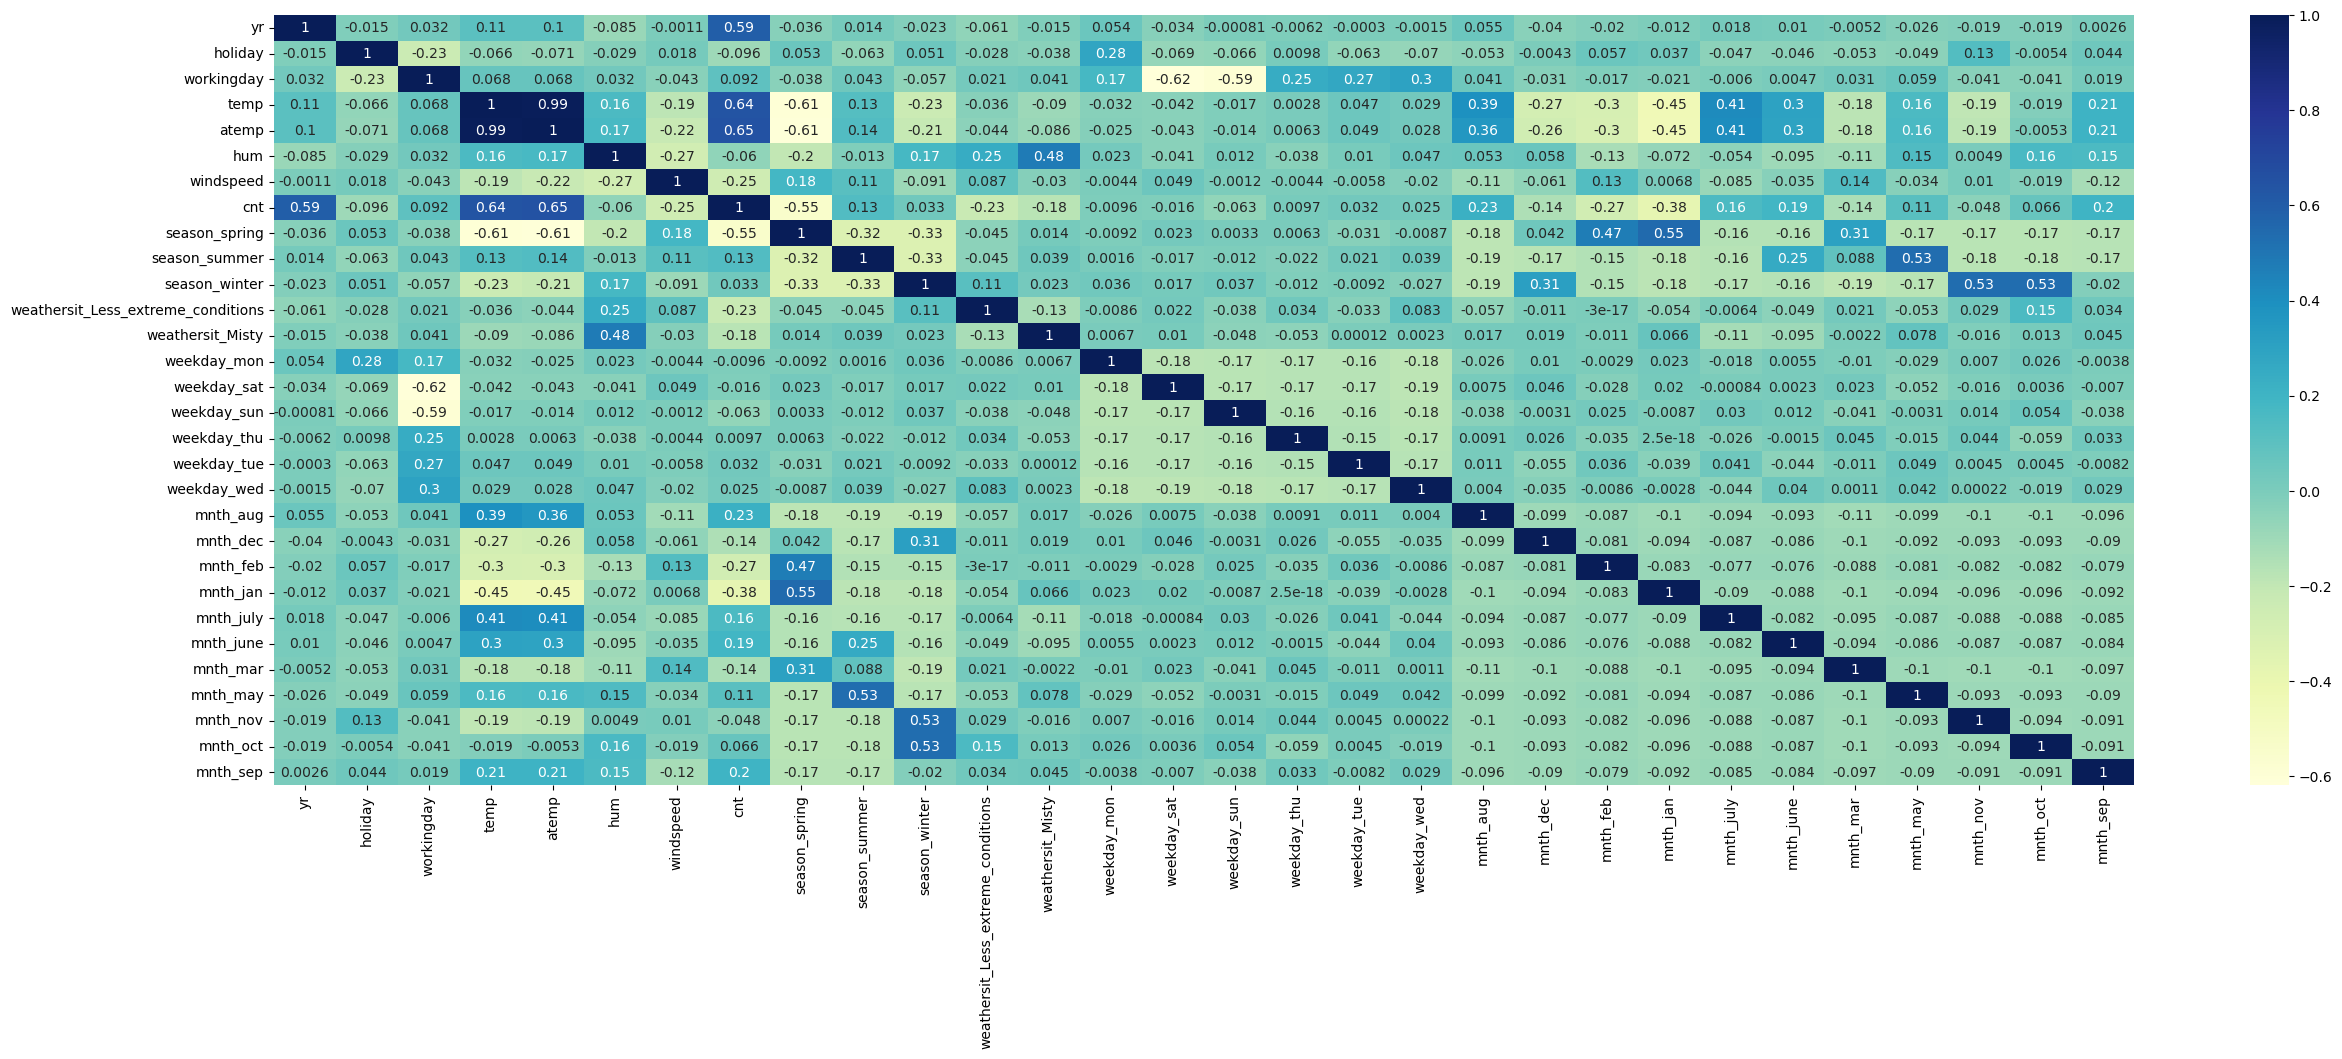

In [36]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Inference: 
1. temp and atemp are highly correlated(positively).
2. Year and target variable(cnt) are highly correlated(positively).
3. spring season is positively correlated with months jan & feb.
4. summer season is positively correlated with month march.
5. winter season is positively correlated with months Oct & Nov.
6. temp and target variable shows strong positive correlation.
7. humidity shows negative correlation with the target variable.

### Dividing into X and Y sets for the model building

In [37]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building a linear model

#### RFE
##### Recursive feature elimination

In [38]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [39]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=15)             # running RFE
lm.fit(X_train, y_train)
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_Less_extreme_conditions', True, 1),
 ('weathersit_Misty', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 11),
 ('mnth_sep', True, 1)]

In [41]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_Less_extreme_conditions', 'weathersit_Misty', 'weekday_sat',
       'mnth_jan', 'mnth_july', 'mnth_sep'],
      dtype='object')

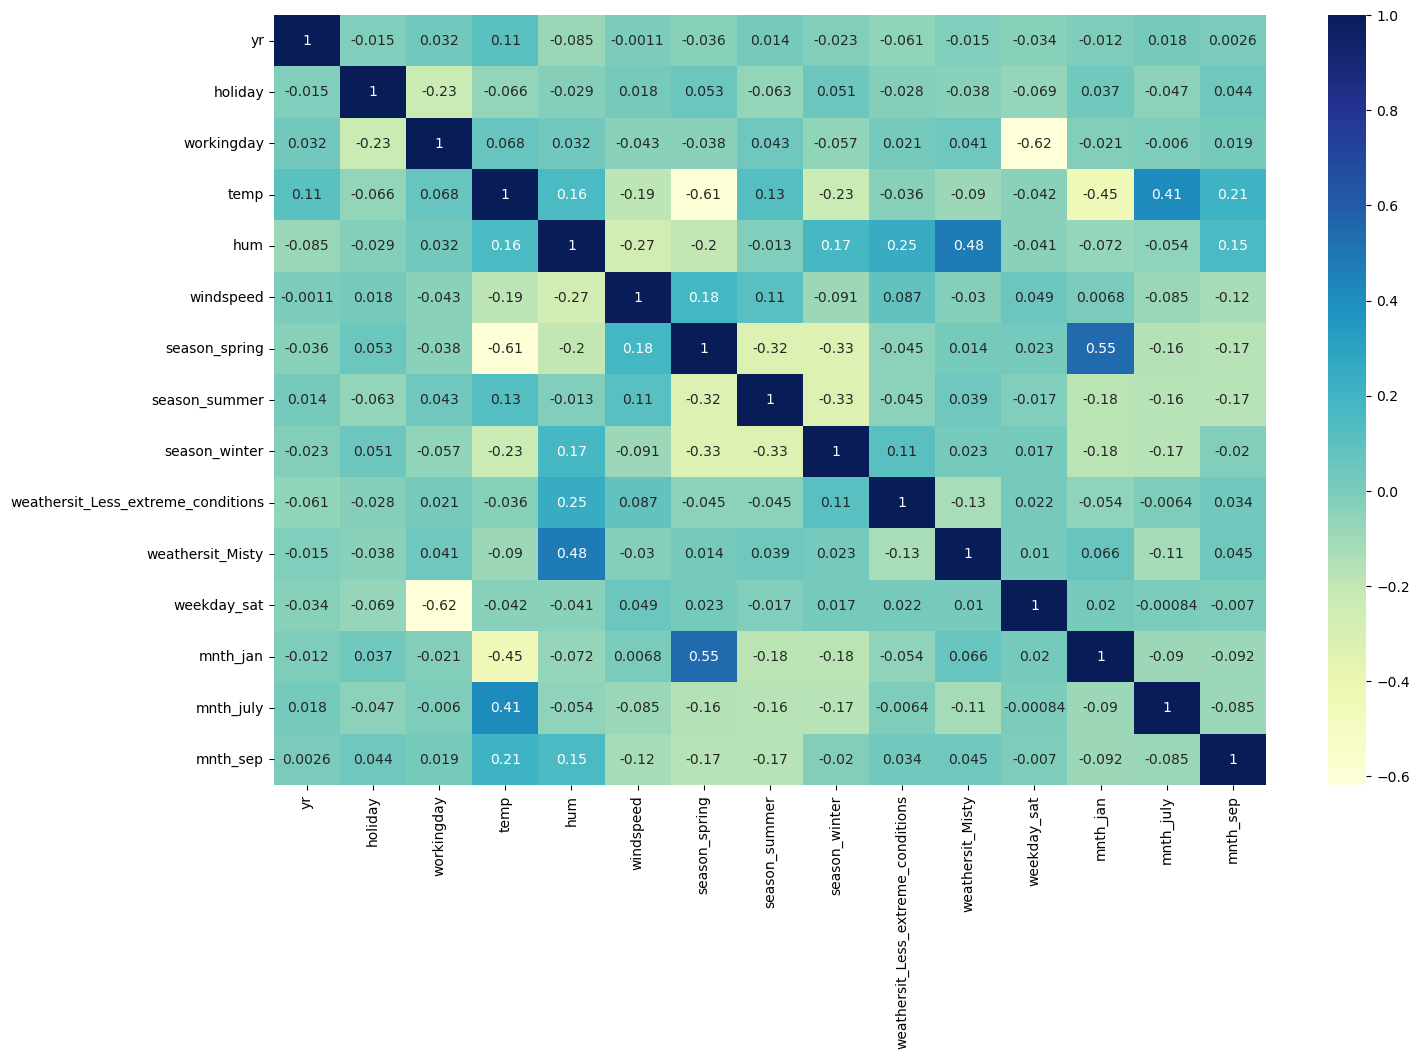

In [42]:
# check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(X_train[col].corr(), annot = True, cmap="YlGnBu")
plt.show()

In [43]:
X_train.columns[~rfe.support_]

Index(['atemp', 'weekday_mon', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [44]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [45]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [46]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [47]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.31e-191
Time:                        21:38:03   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [48]:
# function calculating VIF

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [49]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
# dataframe with RFE selected variables
X_train_rfe = X_train[col]
print(calculateVIF(X_train_rfe))

                              Features    VIF
4                                  hum  29.40
3                                 temp  17.77
2                           workingday   5.31
5                            windspeed   4.73
6                        season_spring   4.53
8                        season_winter   3.48
7                        season_summer   2.84
10                    weathersit_Misty   2.29
0                                   yr   2.09
11                         weekday_sat   1.98
12                            mnth_jan   1.67
13                           mnth_july   1.59
14                            mnth_sep   1.39
9   weathersit_Less_extreme_conditions   1.25
1                              holiday   1.18


humidity has high VIF value, drop the column and rebuild the model.

### Rebuilding the model without humidity

In [50]:
# As mnth_jan shows high p value hence we can drop it
X_train_new = X_train_rfe.drop(['mnth_jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
4,hum,28.49
3,temp,16.97
2,workingday,5.28
5,windspeed,4.72
6,season_spring,4.24
8,season_winter,3.44
7,season_summer,2.83
10,weathersit_Misty,2.28
0,yr,2.08
11,weekday_sat,1.97


In [51]:
# Building linear regression model after dropping mnth_jan
X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          1.13e-191
Time:                        21:38:03   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [52]:
# We can drop hum variable as it has high VIF value
X_train_new = X_train_new.drop(['hum'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)


,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
5,season_spring,2.49
6,season_summer,2.32
0,yr,2.07
7,season_winter,1.99
10,weekday_sat,1.96
11,mnth_july,1.58
9,weathersit_Misty,1.56


In [53]:
# Building linear regression model after dropping hum column
X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          5.73e-189
Time:                        21:38:03   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

#### Dropping 'mnth_jan' was a good decision as the adjusted R-squared value did not change much indicating it was a redundant variable.

### Rebuilding the model without holiday column

In [54]:
# We can drop workingday variable as it has high VIF and low coefficient value.
X_train_new = X_train_new.drop(['workingday'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)



,Features,VIF
2,temp,5.12
3,windspeed,4.62
5,season_summer,2.22
4,season_spring,2.10
0,yr,2.07
6,season_winter,1.80
10,mnth_july,1.58
8,weathersit_Misty,1.55
11,mnth_sep,1.34
9,weekday_sat,1.19


In [55]:
X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.4
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          7.97e-187
Time:                        21:38:03   Log-Likelihood:                 500.76
No. Observations:                 510   AIC:                            -975.5
Df Residuals:                     497   BIC:                            -920.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

#### Dropping 'holiday' was a good decision as the adjusted R-squared value did not change much indicating it was a redundant variable.

In [56]:
# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['mnth_july'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)



,Features,VIF
3,windspeed,4.61
2,temp,3.87
0,yr,2.07
4,season_spring,2.01
5,season_summer,1.89
6,season_winter,1.65
8,weathersit_Misty,1.54
10,mnth_sep,1.23
9,weekday_sat,1.19
7,weathersit_Less_extreme_conditions,1.08


In [57]:
X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.7
Date:                Sun, 27 Aug 2023   Prob (F-statistic):          2.79e-186
Time:                        21:38:03   Log-Likelihood:                 496.65
No. Observations:                 510   AIC:                            -969.3
Df Residuals:                     498   BIC:                            -918.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [58]:
# Checking the parameters and their coefficient values
lr_5.params

const                                 0.187524
yr                                    0.234481
holiday                              -0.093578
temp                                  0.479452
windspeed                            -0.150157
season_spring                        -0.054833
season_summer                         0.061415
season_winter                         0.095938
weathersit_Less_extreme_conditions   -0.286466
weathersit_Misty                     -0.080231
weekday_sat                           0.019463
mnth_sep                              0.090857
dtype: float64

### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [60]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
y_train_pred = lr_5.predict(X_train_lm_5)

C:\Users\I540024\AppData\Local\Temp\ipykernel_19376\3536760436.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

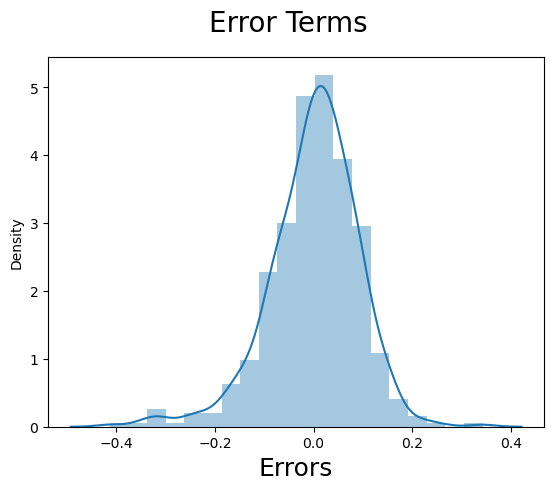

In [78]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

#### Assumption of errors distributed normal with mean 0 is verified.

### Making Predictions
Applying the scaling on the test sets

In [63]:
df_test[numeric_columns] = scaler.transform(df_test[numeric_columns])

Dividing into X_test and y_test

In [64]:
y_test = df_test.pop('cnt')
X_test = df_test

In [65]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [66]:
# Making predictions
y_pred = lr_5.predict(X_test_new)

Text(0, 0.5, 'Counts - Predicted Counts')

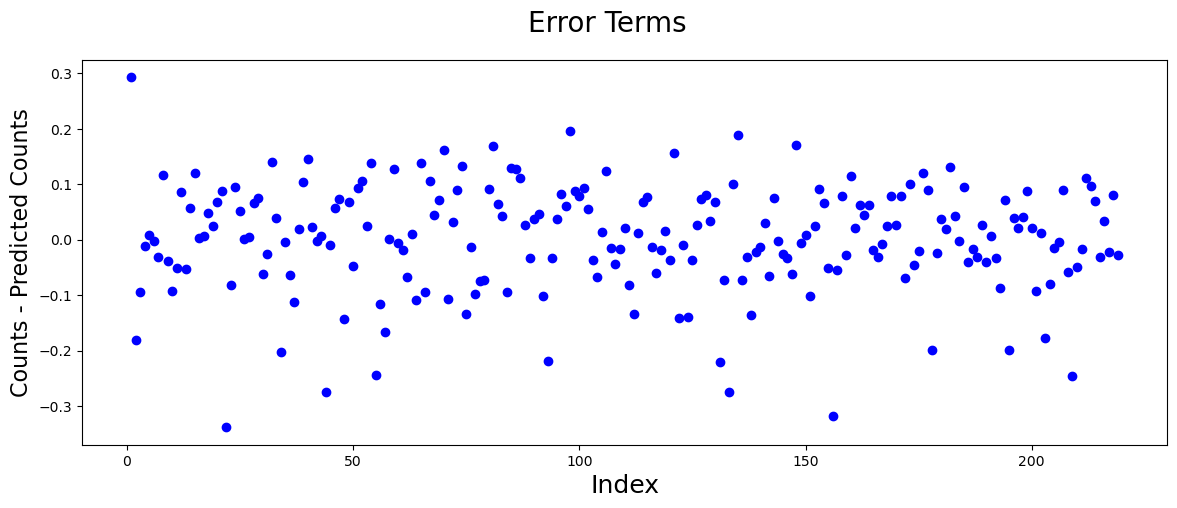

In [74]:
# Error terms
c = [i for i in range(1,220,1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test-y_pred, color="blue", marker='o', linewidth=2.5, linestyle="")
fig.suptitle('Error Terms for test data', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label


### Model Evaluation

Text(0, 0.5, 'y_pred')

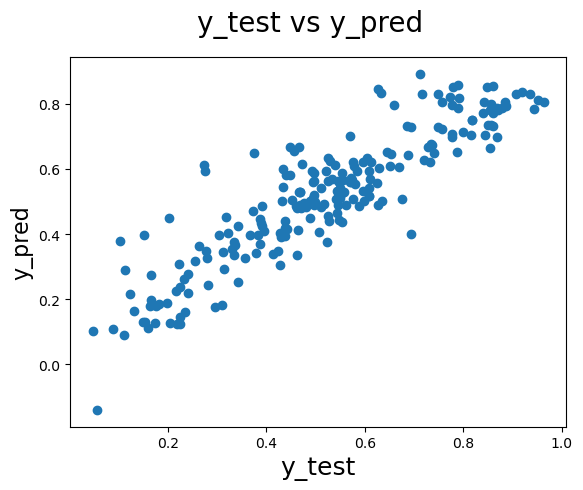

In [68]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [69]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)

0.804051403572662


In [70]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.774


#### Train dataset R square: 0.834
#### Train dataset adjusted R square: 0.830

#### Test dataset R square: 0.804
#### Test dataset adjusted R square: 0.774

# Conclusion

The following are the significant variables affecting demand for shared bikes after analyzing the p values, VIF values and coefficients of variables.
1. Year (Demand increased in 2019 as compared to the demand in 2018).
2. Holiday (Less demand on holidays).
3. Temperature (More the temperature, more the demand).
4. Wind speed (More the wind speed, less the demand).
5. Seasons(Demand more in spring than in summer than in winter).
6. Weathersit(Less demand when Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds).
7. More demand on Saturday.
8. More demand in september. 
